# "Análise de Dados: Um olhar sobre os resultados do FSA - Fundo Setorial Audiovisual e Renúncia Fiscal"

## Análise Exploratória

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import catboost
import ydata_profiling as yp
from matplotlib.ticker import FuncFormatter

---

## Limpeza e Preparação

In [2]:
df_salas_exib = pd.read_csv('SalasDeExibicaoEComplexos.csv')
df_salas_exib.head(5)
df_salas_exib_clean = df_salas_exib[['NOME_SALA', 'REGISTRO_SALA', 'SITUACAO_SALA',
       'ASSENTOS_SALA', 'NOME_COMPLEXO', 'REGISTRO_COMPLEXO',
       'MUNICIPIO_COMPLEXO', 'UF_COMPLEXO',
       'COMPLEXO_ITINERANTE', 'OPERACAO_USUAL', 'EXIBIDOR',
       'SITUACAO_EXIBIDOR','GRUPO_EXIBIDOR']]

#--------------------------------

df_proj_renun_fisc = pd.read_csv('ProjetosRenunciaFiscal.csv')
df_proj_renun_fisc.head(5)
df_proj_renun_fisc_clean = df_proj_renun_fisc[['SALIC', 'TITULO_PROJETO', 'UF_PROPONENTE',
       'SITUACAO_REGISTRO', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'LEI_8313', 'ART1', 'ART1A', 'ART3', 'ART3A', 'ART39', 'FUNCINES',
       'TOTAL_CAPTADO', 'DT_APROVACAO_CAPTACAO', 'DT_1_LIBERACAO']]

def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)

to_datetime(df_proj_renun_fisc_clean, 'DT_1_LIBERACAO')
to_datetime(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')

def to_datetime_b(df, coluna):
    df['ANO_APROVACAO'] = pd.to_datetime(df[coluna],format='%Y-%m-%d').dt.year


to_datetime_b(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')


df_proj_renun_fisc = df_proj_renun_fisc_clean

#-----------------------------------------------------------

df_invest_proj_renun_fiscal = pd.read_csv('InvestidoresEmProjetosRenunciaFiscal.csv')

#---------------------------------

df_proj_fsa_desemb = pd.read_csv('ProjetosContratadosFSAeDesembolso.csv')
df_proj_fsa_desemb

df_proj_fsa_desemb_clean = df_proj_fsa_desemb[['IDENTIFICACAO_CONTRATO', 'TITULO_PROJETO', 'CHAMADA_PUBLICA',
       'ANO_CHAMADA_PUBLICA', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'RAZAO_SOCIAL_PRODUTORA',
       'RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA', 'DT_PUBLICACAO_CONTRATO_DOU',
       'VL_CONTRATO_DOU', 'DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]



def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True, errors='coerce')

to_datetime(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO')

def to_datetime_b(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna],format='%Y')

to_datetime_b(df_proj_fsa_desemb_clean, 'ANO_CHAMADA_PUBLICA')


def to_datetime_c(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format)

to_datetime_c(df_proj_fsa_desemb_clean, 'DT_PUBLICACAO_CONTRATO_DOU', '%Y-%m-%d')

#Preenchendo valores nulos na copluna DT_PRIMEIRO_DESEMBOLSO com a média = 37 dias

df_proj_fsa_desemb_clean_time = df_proj_fsa_desemb_clean.dropna()
df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'] = df_proj_fsa_desemb_clean['DT_PUBLICACAO_CONTRATO_DOU'] - df_proj_fsa_desemb_clean['DT_PRIMEIRO_DESEMBOLSO']
mean = df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'].mean()

def to_datetime_a(df, coluna,coluna2):
    df[coluna] = df[coluna].fillna(pd.to_datetime(df[coluna2])+ pd.DateOffset(day=37))

to_datetime_a(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO', 'DT_PUBLICACAO_CONTRATO_DOU')

df_proj_fsa_desemb = df_proj_fsa_desemb_clean






C:\Users\syafo\AppData\Local\Temp\ipykernel_6864\1130466255.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_6864\1130466255.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_6864\1130466255.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_68

In [3]:
df_proj_renun_fisc

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.00,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.00,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.00,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.00,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.00,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,00-0333,Tainá Uma Aventura na Amazônia - Distribuição,SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,0.0,1330434.0,0.0,859632.64,0.0,0.00,0.0,2190066.64,2000-09-26,2001-02-15,2000
2912,01-3660,Tainá 2 - Aventura Continua (A),SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,1737500.0,3000000.0,0.0,1800000.00,0.0,0.00,0.0,6537500.00,2001-10-29,2003-02-20,2001
2913,07-0295,A Margem da Linha,SP,DEFERIDO,96.496.633/0001-01,CINERAMA FILMES-CF EIRELI,260000.0,0.0,0.0,0.00,0.0,0.00,0.0,260000.00,2007-09-05,2010-12-10,2007
2914,13-0522,Economia Brasileira - A História Contada por Q...,SP,IRREGULAR,97.533.170/0001-73,CULTURA MAIOR COMUNICACAO E CULTURA LTDA. - ME,0.0,0.0,1340000.0,0.00,0.0,0.00,0.0,1340000.00,2013-12-24,2014-09-15,2013


---

## EDA - FSA e Renúncia Fiscal - Investidores e Contemplados

- ### Investidores

In [4]:
df_invest_proj_renun_fiscal.head(5)

,CNPJ_INVESTIDOR,INVESTIDOR,ART25,ART18,ART1A,ART1,ART39,ART3A,ART3,ART41,VL_TOTAL_INVESTIDO
0,00.000.000/0001-91,BANCO DO BRASIL S.A.,1.090267e+06,0.0,100000.0,0.00,0.0,0.0,0.0,0.0,1.190267e+06
1,00.000.208/0001-00,BRB - BANCO DE BRASÍLIA S.A.,1.450000e+05,0.0,0.0,129999.18,0.0,0.0,0.0,0.0,2.749992e+05
2,00.001.180/0001-26,CENTRAIS ELÉTRICAS BRASILEIRAS S.A. - ELETROBRÁS,1.250000e+06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.250000e+06
3,00.001.180/0002-07,ELETROBRÁS - CENTRAIS ELÉTRICAS BRASILEIRAS S.A.,4.196216e+07,455000.0,12380700.2,499630.00,0.0,0.0,0.0,0.0,5.529749e+07
4,00.014.385/0001-46,BV TRADING S/A,0.000000e+00,0.0,0.0,2000.00,0.0,0.0,0.0,0.0,2.000000e+03


- ### Contemplados

In [5]:
df_proj_renun_fisc.head(5)

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.0,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.0,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.0,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.0,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.0,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008


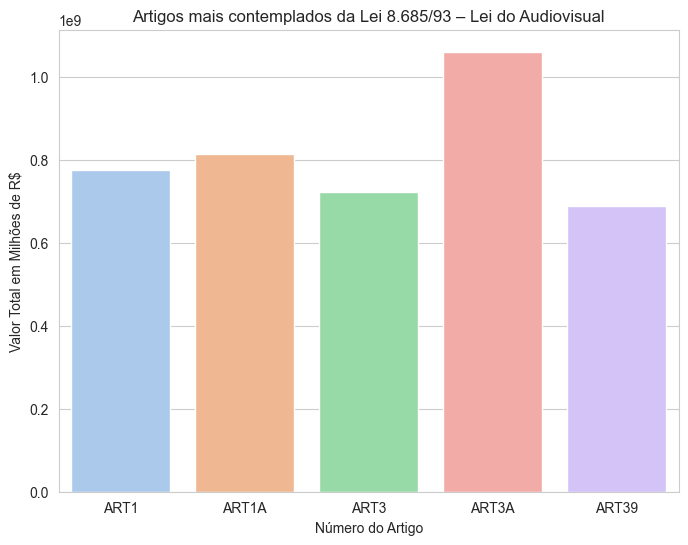

In [6]:
#BAR PLOT - Artigos mais contemplados da Lei 8.685/93 – Lei do Audiovisual
somas_df = pd.DataFrame({
    'Tipo de ART': ['ART1', 'ART1A', 'ART3', 'ART3A', 'ART39'],
    'Somatória': [
        df_proj_renun_fisc['ART1'].sum(),
        df_proj_renun_fisc['ART1A'].sum(),
        df_proj_renun_fisc['ART3'].sum(),
        df_proj_renun_fisc['ART3A'].sum(),
        df_proj_renun_fisc['ART39'].sum()
    ]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=somas_df, x='Tipo de ART', y='Somatória', palette='pastel')
plt.xlabel('Número do Artigo')
plt.ylabel('Valor Total em Milhões de R$')
plt.title('Artigos mais contemplados da Lei 8.685/93 – Lei do Audiovisual')
plt.show()


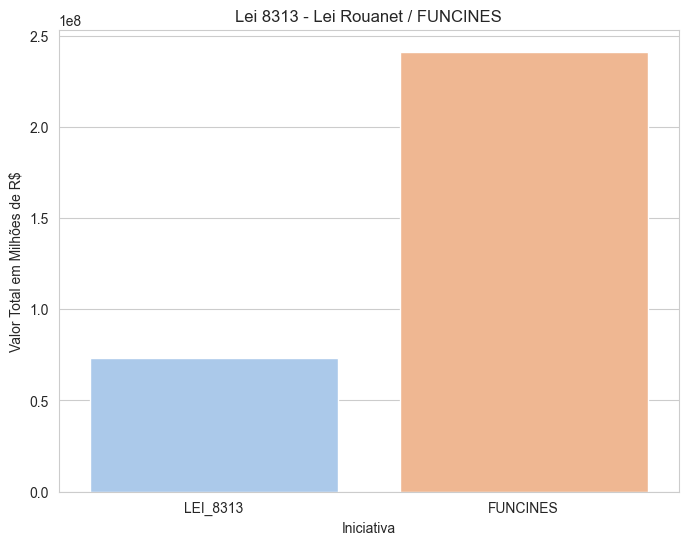

In [7]:
#BAR PLOT - Lei 8313 - Lei Rouanet / FUNCINES
somas_df = pd.DataFrame({
    'Tipo de ART': ['LEI_8313', 'FUNCINES'],
    'Somatória': [
        df_proj_renun_fisc['FUNCINES'].sum(),
        df_proj_renun_fisc['LEI_8313'].sum(),
    ]
})


plt.figure(figsize=(8, 6))
sns.barplot(data=somas_df, x='Tipo de ART', y='Somatória', palette='pastel')
plt.xlabel('Iniciativa')
plt.ylabel('Valor Total em Milhões de R$')
plt.title('Lei 8313 - Lei Rouanet / FUNCINES')
plt.show()


In [29]:
projetos = df_proj_renun_fisc.nlargest(5, 'TOTAL_CAPTADO')
projetos

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
2627,18-0065,O Hóspede Americano (The American Guest),SP,DEFERIDO,61.383.022/0001-72,LYNXFILM PRODUÇÕES AUDIO-VISUAIS LTDA,0.0,0.0,0.0,0.0,0.0,14634931.60,0.0,14634931.60,2018-01-25,2018-05-29,2018
957,10-0480,Preamar,RJ,DEFERIDO,04.453.786/0001-53,PINDORAMA FILMES LTDA,0.0,0.0,0.0,0.0,2235422.0,11787537.64,0.0,14022959.64,2011-02-23,2011-04-25,2011
256,17-0536,HARD,SP,DEFERIDO,01.378.559/0001-12,GULLANE ENTRETENIMENTO S.A.,0.0,0.0,0.0,0.0,0.0,13980494.00,0.0,13980494.00,2017-09-29,2018-01-24,2017
954,16-0687,Santos = Dumont,RJ,DEFERIDO,04.453.786/0001-53,PINDORAMA FILMES LTDA,0.0,0.0,0.0,0.0,0.0,13198895.23,0.0,13198895.23,2016-11-01,2017-07-05,2016
1219,15-0451,PACTO DE SANGUE (Ex A LEI),SP,DEFERIDO,05.832.663/0001-96,INTRO PICTURES PRODUÇÕES CINEMATOGRÁFICAS LTDA,0.0,0.0,0.0,0.0,0.0,10140257.01,0.0,10140257.01,2015-09-16,2016-12-13,2015


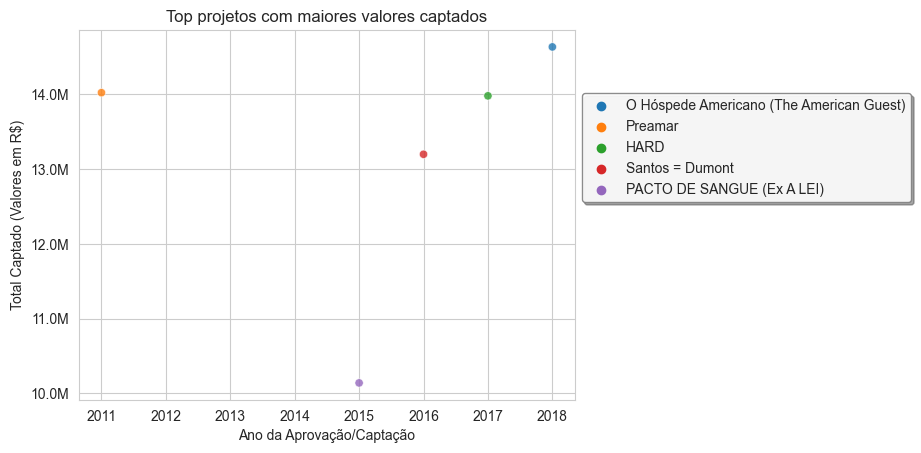

In [35]:
#SCATTER PLOT - Valores Totais Captados - Top 5 Produtoras Brasileiras
conspira_nome = {'CONSPIRAÇÃO FILMES ENTRETENIMENTO 3º MILÊNIO LTDA.': 'CONSPIRAÇÃO FILMES S/A'}
df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].replace(conspira_nome)

top_proj_renun_fisc = df_proj_renun_fisc.nlargest(5, 'TOTAL_CAPTADO')
sns.scatterplot(data=top_proj_renun_fisc, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.8, hue='TITULO_PROJETO')

plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Top projetos com maiores valores captados')

legend_labels = ['CONSPIRAÇÃO FILMES S/A', 'Project 2', 'Project 3']
plt.legend( loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=.9, frameon=True, shadow=True,
                edgecolor='gray', facecolor='white')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=.9, frameon=True, shadow=True,
#                 edgecolor='gray', facecolor='white')

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()


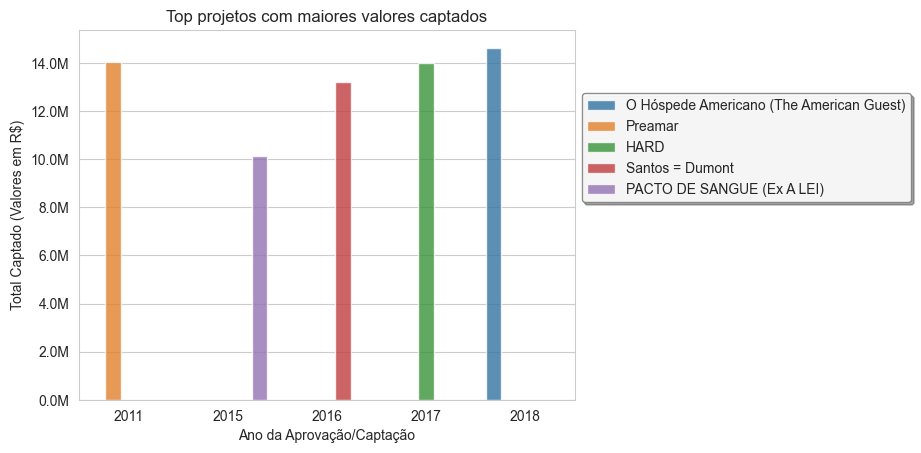

In [ ]:
#SCATTER PLOT - Valores Totais Captados - Top 5 Produtoras Brasileiras
conspira_nome = {'CONSPIRAÇÃO FILMES ENTRETENIMENTO 3º MILÊNIO LTDA.': 'CONSPIRAÇÃO FILMES S/A'}
df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].replace(conspira_nome)

top_proj_renun_fisc = df_proj_renun_fisc.nlargest(5, 'TOTAL_CAPTADO')
sns.barplot(data=top_proj_renun_fisc, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.8, hue='TITULO_PROJETO')

plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Top projetos com maiores valores captados')

legend_labels = ['CONSPIRAÇÃO FILMES S/A', 'Project 2', 'Project 3']
plt.legend( loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=.9, frameon=True, shadow=True,
                edgecolor='gray', facecolor='white')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=.9, frameon=True, shadow=True,
#                 edgecolor='gray', facecolor='white')

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()


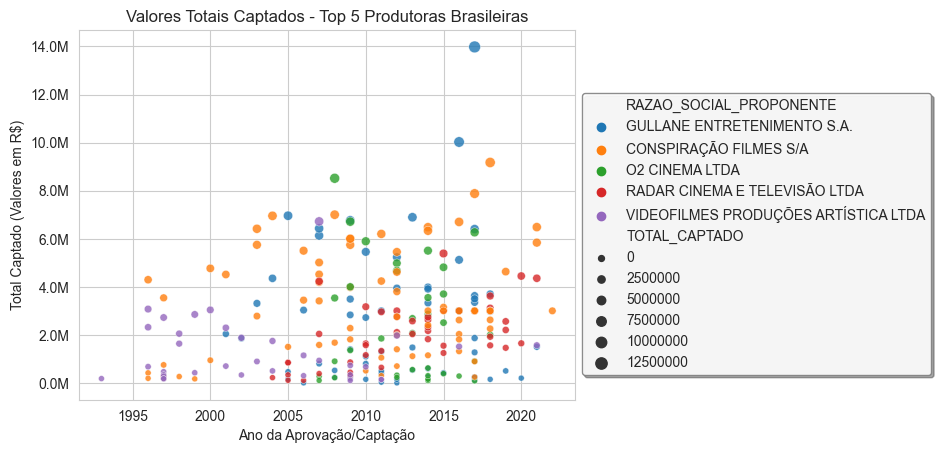

In [9]:
#SCATTER PLOT - Valores Totais Captados - Top 5 Produtoras Brasileiras
conspira_nome = {'CONSPIRAÇÃO FILMES ENTRETENIMENTO 3º MILÊNIO LTDA.': 'CONSPIRAÇÃO FILMES S/A'}
df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].replace(conspira_nome)
top_proj_renun_fisc = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].value_counts().head(5).index
top_proj_renun_fisc_data = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].isin(top_proj_renun_fisc)]


sns.scatterplot(data=top_proj_renun_fisc_data, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.8, hue='RAZAO_SOCIAL_PROPONENTE', size='TOTAL_CAPTADO', )


plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Valores Totais Captados - Top 5 Produtoras Brasileiras')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=.9, frameon=True, shadow=True,
                edgecolor='gray', facecolor='white')

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()



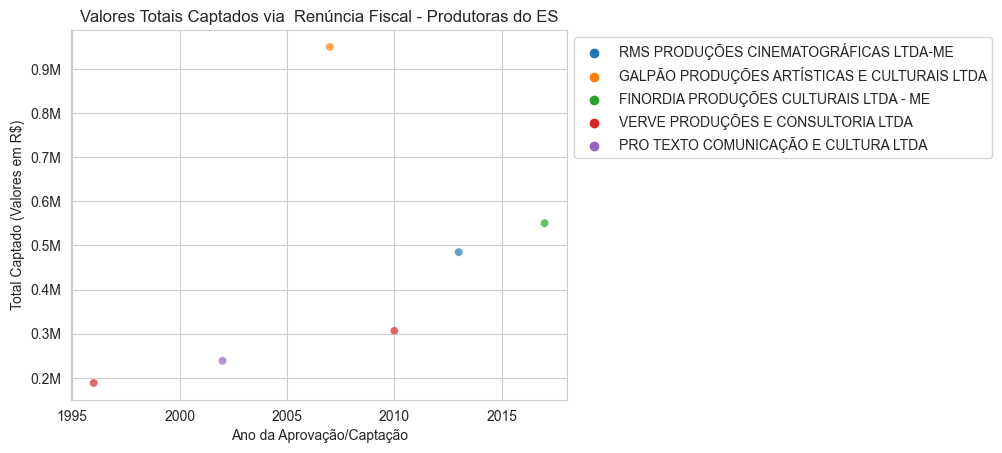

In [10]:
# SCATTER PLOT - Valores Totais Captados via  Renúncia Fiscal - Produtoras do ES
top_proj_renun_fisc = df_proj_renun_fisc[df_proj_renun_fisc['UF_PROPONENTE'] == 'ES']
top_proj_renun_fisc_data = df_proj_renun_fisc[df_proj_renun_fisc['UF_PROPONENTE'].isin(top_proj_renun_fisc['UF_PROPONENTE'])]

sns.scatterplot(data=top_proj_renun_fisc_data, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.7, hue='RAZAO_SOCIAL_PROPONENTE')


plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Valores Totais Captados via  Renúncia Fiscal - Produtoras do ES')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()


---

## EDA - FSA - Fundo Setorial Audiovisual

In [11]:
df_proj_fsa_desemb.head(5)

,IDENTIFICACAO_CONTRATO,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,RAZAO_SOCIAL_PRODUTORA,RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
0,02.09.0557.00,DE PERNAS PRO AR,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,MORENA FILMES EIRELI - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,3000000.0,2009-12-21,3000000.0
1,02.09.0558.00,DESENROLA,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,RACCORD PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICA...,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,2000000.0,2009-12-21,2000000.0
2,02.09.0601.00,HISTÓRIAS DE AMOR DURAM APENAS 90 MINUTOS,PRODECINE 01,2008-01-01,31.939.739/0001-97,TIPOS E TEMPOS PRODUÇÕES LTDA,TIPOS E TEMPOS PRODUÇÕES LTDA,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-24,300000.0,2010-01-13,300000.0
3,02.09.0592.00,INSOLAÇÃO,PRODECINE 01,2008-01-01,05.919.250/0001-43,"CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...","CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...",CANNES PRODUÇÕES S/A,2009-12-24,500000.0,2010-01-15,500000.0
4,02.09.0614.00,DO COMEÇO AO FIM,PRODECINE 01,2008-01-01,03.838.776/0001-73,HARE FILMES PRODUCOES LTDA - ME,HARE FILMES PRODUCOES LTDA - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-29,461740.0,2010-01-13,461740.0


---

In [12]:
# def group_and_plot(df, coluna, coluna2):
#     if coluna not in df.columns:
#         print(f"Column '{coluna}' not found in the DataFrame.")
#         return

#     valor_count = df[coluna2].value_counts()
#     top_10 = valor_count.sort_values(ascending=False).head(10)

#     if coluna == 'TOTAL_CAPTADO':
#         fig, ax = plt.subplots(figsize=(10, 4))
#         ax.bar(top_10.index, top_10[coluna] / 1000000000, width=0.6, edgecolor='black')
#         ax.set_title('Top 10 - Renda')
#         ax.set_xlabel('País')
#         ax.set_ylabel('Renda Total - Valores em R$')

#         def currency_formatter(x, pos):
#             return "{:.0f} bi".format(x)

#         ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

#     elif coluna == 'LEI_8313':
#         fig, ax = plt.subplots(figsize=(10, 4))
#         ax.bar(top_10.index, top_10[coluna], width=0.6, edgecolor='black')
#         ax.set_title('Top 10 - Público')
#         ax.set_xlabel('País')
#         ax.set_ylabel('Público Total')

#         def people_formatter(x, pos):
#             return "{:,.1f}".format(x).replace(",", ".")

#         ax.yaxis.set_major_formatter(FuncFormatter(people_formatter))

#     else:
#         print(f"Column '{coluna}' is not supported in the plotting function.")
#         return

#     plt.xticks(rotation=30, ha='right')
#     plt.tight_layout()
#     plt.show()

# # Call the function with 'TOTAL_CAPTADO'
# group_and_plot(df_proj_renun_fisc, 'TOTAL_CAPTADO', 'RAZAO_SOCIAL_PROPONENTE')